In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
from qiskit.providers.aer import noise
import numpy as np

In [2]:
coupling_map = [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]    # コネクティビティーのセット

In [3]:
# ibmq_5_Tenerife のノイズモデルをセット
noise_dict = {'errors': [{'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0004721766167523067, 0.0004721766167523067, 0.0004721766167523067, 0.9985834701497431], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.000901556048412383, 0.000901556048412383, 0.000901556048412383, 0.9972953318547628], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0011592423249461303, 0.0011592423249461303, 0.0011592423249461303, 0.9965222730251616], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0009443532335046134, 0.0009443532335046134, 0.0009443532335046134, 0.9971669402994862], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.001803112096824766, 0.001803112096824766, 0.001803112096824766, 0.9945906637095256], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0023184846498922607, 0.0023184846498922607, 0.0023184846498922607, 0.9930445460503232], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.9672573379090872], 'gate_qubits': [[1, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.9699888805021712], 'gate_qubits': [[2, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.9627184072576159], 'gate_qubits': [[2, 1]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.9437457618579164], 'gate_qubits': [[3, 2]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.9339816349935997], 'gate_qubits': [[3, 4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.9307167621063416], 'gate_qubits': [[4, 2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9372499999999999, 0.06275000000000008], [0.06275000000000008, 0.9372499999999999]], 'gate_qubits': [[0]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9345, 0.0655], [0.0655, 0.9345]], 'gate_qubits': [[1]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.97075, 0.029249999999999998], [0.029249999999999998, 0.97075]], 'gate_qubits': [[2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9742500000000001, 0.02574999999999994], [0.02574999999999994, 0.9742500000000001]], 'gate_qubits': [[3]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.8747499999999999, 0.12525000000000008], [0.12525000000000008, 0.8747499999999999]], 'gate_qubits': [[4]]}], 'x90_gates': []}
noise_model = noise.noise_model.NoiseModel.from_dict( noise_dict )

//anaconda3/envs/qiskit023_3/lib/python3.7/site-packages/qiskit/providers/aer/noise/noise_model.py:439: DeprecationWarning: This function is deprecated and will be removed in a future release. To use an X90 based noise model use the Sqrt(X) "sx" gate and one of  the single-qubit phase gates "u1", "rx", "p" in the noise model and  basis gates to decompose into this gateset for noise simulations.
  DeprecationWarning)


In [4]:
qr = QuantumRegister(5, 'qr')
cr = ClassicalRegister(1, 'cr')
backend = Aer.get_backend('qasm_simulator')

In [5]:
def AND (input1,input2, q_1=0,q_2=1,q_out=2):
    # q_1 が入力1、q_2 が入力2、q_out が出力 　
    # で、それぞれ0,1,2の量子ビットにセット
    
    qc = QuantumCircuit(qr, cr)
    
    # 入力が１、１のときq_1とq_2にXゲートをかける
    if input1=='1':
        qc.x( qr[ q_1 ] )
    if input2=='1':
        qc.x( qr[ q_2 ] )
    
    qc.ccx(qr[ q_1 ],qr[ q_2 ],qr[ q_out ]) # CCXを使ってANDを行う
    qc.measure(qr[ q_out ],cr[0]) # q_outからの出力を測定
    
    # 回路はシミュレーターで実行されますが、Tenerife のノイズと接続性も再現されるように実行されます
    job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
    output = job.result().get_counts()
    
    return output

たとえば、両方の入力が`0`の場合の結果は次のとおりです。

{'0': 8917, '1': 1083}


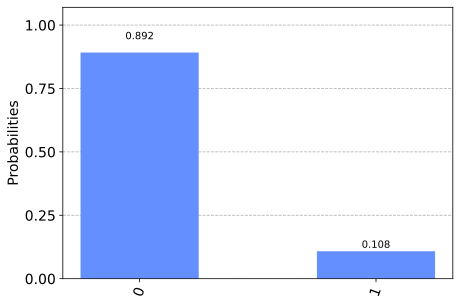

In [6]:
result = AND('0','0')
print( result )
plot_histogram( result )

すべて（0x0, 0x1, 1x0, 1x1）の結果を比較して、最も信頼性の低いものを見つけます。

In [7]:
worst = 1
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('\nProbability of correct answer for inputs',input1,input2)
        prob = AND(input1,input2, q_1=0,q_2=1,q_out=2)\
        [str(int( input1=='1' and input2=='1' ))]/10000
        print( prob )
        worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
0.9019

Probability of correct answer for inputs 0 1
0.9028

Probability of correct answer for inputs 1 0
0.9067

Probability of correct answer for inputs 1 1
0.8943

The lowest of these probabilities was 0.8943


In [ ]:
# CCXゲートをu3ゲートとcxゲートに分解

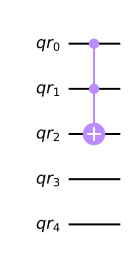

In [8]:
qc = QuantumCircuit(qr)
qc.ccx(qr[0],qr[1],qr[2]) 
qc.draw('mpl')

OrderedDict([('u3', 9), ('cx', 6)])


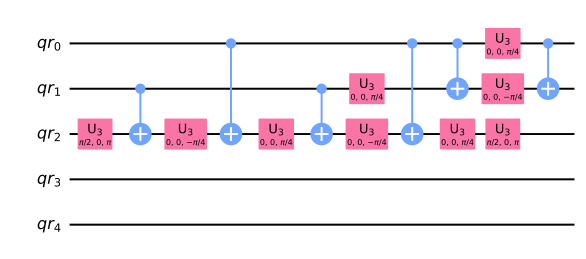

In [9]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
gates=new_circuit.count_ops()
print(gates)
new_circuit.draw(output='mpl')

In [12]:
# 3CNOTでのCCXをu3ゲートとcxゲートに分解

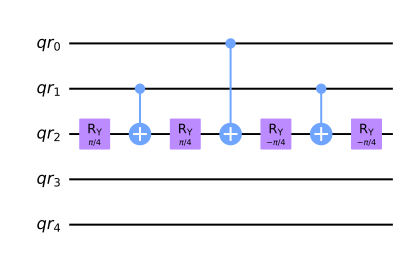

In [10]:
qc = QuantumCircuit(qr)
qc.ry(np.pi/4, qr[2])
qc.cx(qr[1], qr[2])
qc.ry(np.pi/4, qr[2])
qc.cx(qr[0], qr[2])
qc.ry(-np.pi/4, qr[2])
qc.cx(qr[1], qr[2])
qc.ry(-np.pi/4, qr[2])
qc.draw('mpl')

OrderedDict([('u3', 4), ('cx', 3)])


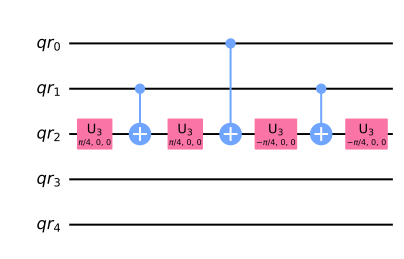

In [11]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
gates=new_circuit.count_ops()
print(gates)
new_circuit.draw(output='mpl')

In [ ]:
# 3CNOTでANDゲートを作る

In [12]:
def my_AND(input1,input2, q_1=0,q_2=1,q_out=2):
    qc = QuantumCircuit(qr, cr)
    
    # 入力が１、１のときq_1とq_2にXゲートをかける
    if input1=='1':
        qc.x( qr[ q_1 ] )
    if input2=='1':
        qc.x( qr[ q_2 ] )
    
    qc.ry(np.pi/4, qr[ q_out ])
    qc.cx(qr[ q_2 ], qr[ q_out ])
    qc.ry(np.pi/4, qr[ q_out ])
    qc.cx(qr[ q_1 ], qr[ q_out ])
    qc.ry(-np.pi/4, qr[ q_out ])
    qc.cx(qr[ q_2 ], qr[ q_out ])
    qc.ry(-np.pi/4, qr[ q_out ])
    
    qc.measure(qr[ q_out ],cr[0]) # q_outからの出力を測定

    job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
    output = job.result().get_counts()
    
    return output

{'0': 9116, '1': 884}


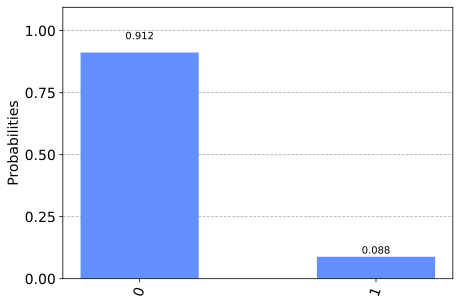

In [13]:
result = my_AND('0','0')
print( result )
plot_histogram( result )

In [14]:
#すべて（0x0, 0x1, 1x0, 1x1）の結果を比較して、最も信頼性の低いものを見つける
worst = 1
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('\nProbability of correct answer for inputs',input1,input2)
        prob = my_AND(input1,input2, q_1=0,q_2=1,q_out=2)[str(int( input1=='1' and input2=='1' ))]/10000
        print( prob )
        worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
0.9156

Probability of correct answer for inputs 0 1
0.9123

Probability of correct answer for inputs 1 0
0.9127

Probability of correct answer for inputs 1 1
0.9063

The lowest of these probabilities was 0.9063


In [ ]:
# 実Qubitの組み合わせを変える（3CNOTで）

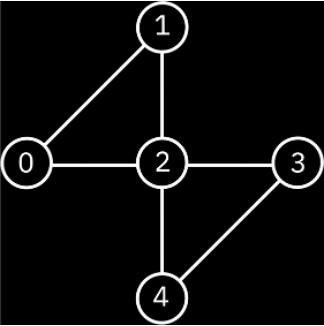

In [15]:
def my_AND_(input1,input2, q_1,q_2,q_out):   # 変数を修正
    qc = QuantumCircuit(qr, cr)
    
    # 入力が１、１のときq_1とq_2にXゲートをかける
    if input1=='1':
        qc.x( qr[ q_1 ] )
    if input2=='1':
        qc.x( qr[ q_2 ] )
    
    qc.ry(np.pi/4, qr[ q_out ])
    qc.cx(qr[ q_2 ], qr[ q_out ])
    qc.ry(np.pi/4, qr[ q_out ])
    qc.cx(qr[ q_1 ], qr[ q_out ])
    qc.ry(-np.pi/4, qr[ q_out ])
    qc.cx(qr[ q_2 ], qr[ q_out ])
    qc.ry(-np.pi/4, qr[ q_out ])
    
    qc.measure(qr[ q_out ],cr[0]) # q_outからの出力を測定
    
    job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
    output = job.result().get_counts()
    
    return output

In [16]:
import itertools
best = 0
best_perm=[]
for x0,x1,x2 in list(itertools.permutations([0,1,2])):    #0,1,2の順列全て試す
    worst = 1
    print('q0 q1 q2=',x0,x1,x2)
    for input1 in ['0','1']:
        for input2 in ['0','1']:
            prob = my_AND_(input1,input2, x0,x1,x2)\
            [str(int( input1=='1' and input2=='1' ))]/10000
            print('input: ',input1,input2,',  Probability', prob )
            worst = min(worst,prob)
    print('The lowest of these probabilities was',worst)
    if worst > best:
        best_perm=[x0,x1,x2]
        best = worst
        
for x0,x1,x2 in list(itertools.permutations([2,3,4])):    #2,3,4の順列全て試す
    print('q0 q1 q2=',x0,x1,x2)
    for input1 in ['0','1']:
        for input2 in ['0','1']:
            prob = my_AND_(input1,input2, x0,x1,x2)\
            [str(int( input1=='1' and input2=='1' ))]/10000
            print('input: ',input1,input2,',  Probability', prob )
            worst = min(worst,prob)
    print('The lowest of these probabilities was',worst)
    if worst > best:
        best_perm=[x0,x1,x2]
        best = worst
        
print('一番良いQubitの配列　',best_perm, best)

q0 q1 q2= 0 1 2
input:  0 0 ,  Probability 0.9154
input:  0 1 ,  Probability 0.9184
input:  1 0 ,  Probability 0.9138
input:  1 1 ,  Probability 0.913
The lowest of these probabilities was 0.913
q0 q1 q2= 0 2 1
input:  0 0 ,  Probability 0.8796
input:  0 1 ,  Probability 0.8798
input:  1 0 ,  Probability 0.8809
input:  1 1 ,  Probability 0.8802
The lowest of these probabilities was 0.8796
q0 q1 q2= 1 0 2
input:  0 0 ,  Probability 0.9199
input:  0 1 ,  Probability 0.9147
input:  1 0 ,  Probability 0.9142
input:  1 1 ,  Probability 0.9165
The lowest of these probabilities was 0.9142
q0 q1 q2= 1 2 0
input:  0 0 ,  Probability 0.8823
input:  0 1 ,  Probability 0.8839
input:  1 0 ,  Probability 0.8925
input:  1 1 ,  Probability 0.8855
The lowest of these probabilities was 0.8823
q0 q1 q2= 2 0 1
input:  0 0 ,  Probability 0.877
input:  0 1 ,  Probability 0.885
input:  1 0 ,  Probability 0.8807
input:  1 1 ,  Probability 0.8794
The lowest of these probabilities was 0.877
q0 q1 q2= 2 1 0
inpu

In [20]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.0',
 'qiskit-aer': '0.7.0',
 'qiskit-ignis': '0.5.0',
 'qiskit-ibmq-provider': '0.11.0',
 'qiskit-aqua': '0.8.0',
 'qiskit': '0.23.0'}

https://github.com/Qiskit/ibmq-device-information/tree/master/backends/tenerife/V1